In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
N=10
r1,r2,r3,r4=1,1,1,1
vin=5

In [76]:
def A_matrix(N):
    A = np.zeros((N, N), float)
    #First row
    A[0,0]=3
    A[0,1]=-1
    A[0,2]=-1
    #second row
    A[1,0]=-1
    A[1,1]=4
    A[1,2]=-1
    A[1,3]=-1
    #middle rows
    for i in range(2,N-2):
        A[i,i] = 4
        A[i,i+1] = -1
        A[i,i+2] = -1
        A[i,i-1] = -1
        A[i,i-2] = -1
    #second to the last row
    A[N-2,N-2]=4
    A[N-2,N-3]=-1
    A[N-2,N-4]=-1
    A[N-2,N-1]=-1
    #last row
    A[N-1,N-1]=3
    A[N-1,N-2]=-1
    A[N-1,N-3]=-1
    return A
    
coeff_matrix=A_matrix(N)
print("coefficient matrix")
print(coeff_matrix)

coefficient matrix
[[ 3. -1. -1.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  4. -1. -1.  0.  0.  0.  0.  0.  0.]
 [-1. -1.  4. -1. -1.  0.  0.  0.  0.  0.]
 [ 0. -1. -1.  4. -1. -1.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  4. -1. -1.  0.  0.  0.]
 [ 0.  0.  0. -1. -1.  4. -1. -1.  0.  0.]
 [ 0.  0.  0.  0. -1. -1.  4. -1. -1.  0.]
 [ 0.  0.  0.  0.  0. -1. -1.  4. -1. -1.]
 [ 0.  0.  0.  0.  0.  0. -1. -1.  4. -1.]
 [ 0.  0.  0.  0.  0.  0.  0. -1. -1.  3.]]


In [77]:
def matrix_vin(N):
    v=np.zeros((N,1), float)
    v[0,0]=vin
    v[1,0]=vin
    return v

vin_matrix=matrix_v(N)
print("vin column matrix")
print(vin_matrix)

vin column matrix
[[5.]
 [5.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [78]:
v_matrix=np.linalg.solve(coeff_matrix,vin_matrix)
print("unknown v matrix")
print(v_matrix)

unknown v matrix
[[4.12573674]
 [3.9194499 ]
 [3.45776031]
 [3.09430255]
 [2.69155206]
 [2.30844794]
 [1.90569745]
 [1.54223969]
 [1.0805501 ]
 [0.87426326]]


In [79]:
source_current=vin-v_matrix[0]
print("source current")
print(source_current)

source current
[0.87426326]


In [80]:
R_eff=vin/source_current
print("effective resistance")
print(R_eff)

effective resistance
[5.71910112]


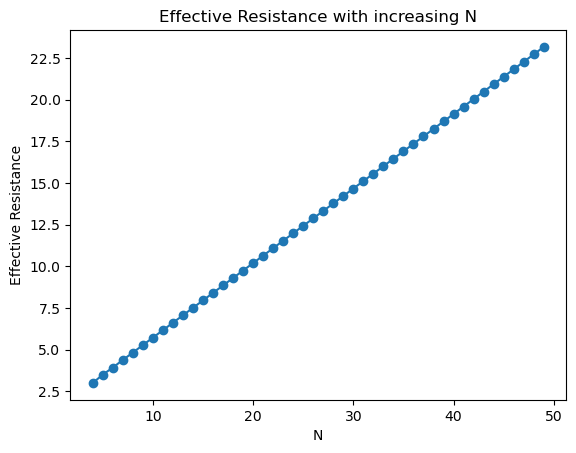

In [83]:
fig,ax=plt.subplots()

def eff_res(vin):
    R_eff_N=[]
    for N in range(4,50):
        coeff_matrix=A_matrix(N)
        vin_matrix=matrix_v(N)
        v_matrix=np.linalg.solve(coeff_matrix,vin_matrix)
        source_current=vin-v_matrix[0]
        R_eff=vin/source_current
        R_eff_N.append(R_eff)
    return R_eff_N

Ns=list(range(4,50))
R_effective=eff_res(vin)

ax.plot(Ns, R_effective, marker='o')
ax.set_xlabel('N')
ax.set_ylabel('Effective Resistance')
ax.set_title('Effective Resistance with increasing N')
plt.savefig("Matrices1.png")
plt.show()